Github link of Krish Sir's Repo 
https://github.com/krishnaik06/Feature-Engineering-Live-sessions

# Missing Values - Feature Engineering - Day 1

Life cycle of a Data Science Projects --->

1. Data Collection Strategy ->
- from company side, 3rd party API's, Survays

2. Feature Engineering ->
- Handling Missing Values
(Try to understand and find why values are missing)

For Example in any survay people will not fill any specific thing so it will be missing value 

Why are their missing vlaues -- Survay in a company
- They hesitate to put donw the information.
- Survay info are not that valid.
- Men is not insterested to fill salary.
- Women is not insterested to disclose age.

* In Data Science project -- Dataset should be collected from multipl sources *

#### What are the different types of missing data
1. **Missing Completely at Random, MCAR**:

A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv('Datasets/titanic.csv')

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here Age and Cabin has null values based on some relaion so these are not here MCAR.

In [7]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [8]:
df['Embarked'].isnull().sum()

2

2. **Missing Data not at Random (MNAR)** : Systematic Missing Values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

- Here Age and Cabin missing values are of this type.

In [9]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [11]:
## find the percentage of the null values
df['cabin_null'].mean()

0.7710437710437711

In [12]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

3. **Missing at Random** (MAR)

##### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### Mean, Median and Mode Imputation

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [14]:
df = pd.read_csv('Datasets/titanic.csv', usecols = ['Age','Fare','Survived'])

In [15]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [17]:
def impute_nan_age(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [18]:
df['Age'].median()

28.0

In [19]:
age_median = df['Age'].median()

In [20]:
impute_nan_age(df,'Age',age_median)

In [21]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [23]:
print("Std for Age column ",df['Age'].std())
print("Std for Age_median column ",df['Age_median'].std())

Std for Age column  14.526497332334044
Std for Age_median column  13.019696550973194


In [24]:
import matplotlib.pyplot as plt 

In [25]:
%matplotlib inline

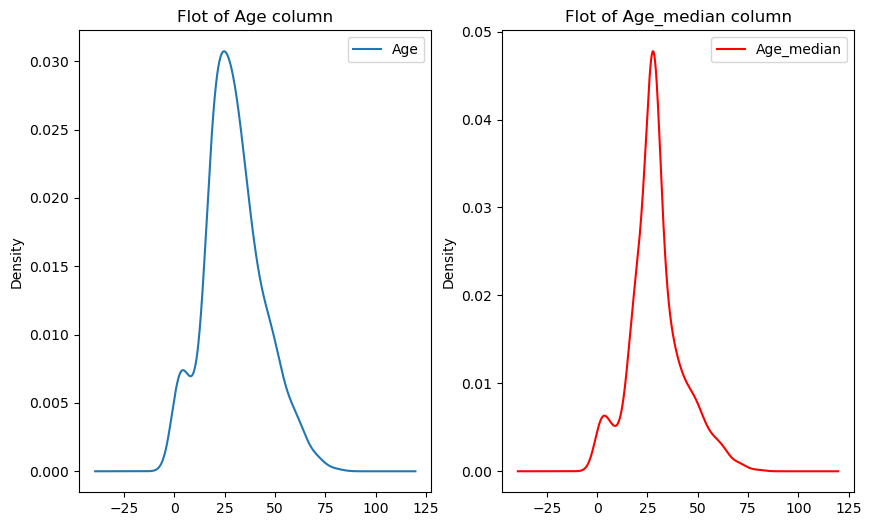

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title("Flot of Age column")
df['Age'].plot(kind='kde')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.title("Flot of Age_median column")
df['Age_median'].plot(kind='kde',color='red')
plt.legend(loc='best')

plt.show()

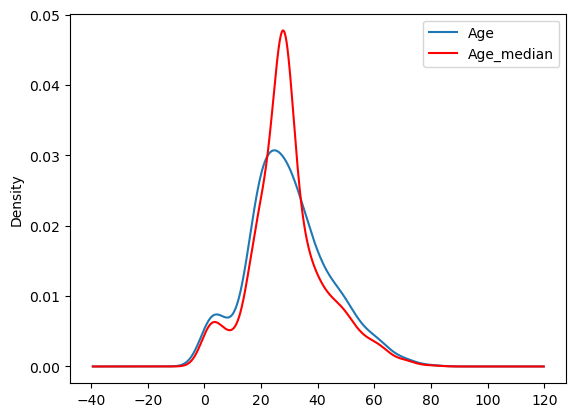

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')

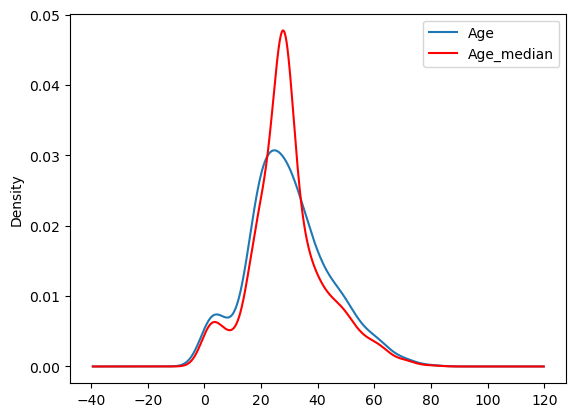

In [ ]:
plt.subplot(1,1,1)
df['Age'].plot(kind='kde')
df.Age_median.plot(kind='kde', color='red') 
plt.legend(labels,loc='best')
plt.show()


### KDE - Kernel Density Estimitor

### Advantages and Disadvantages of Mean/Median Imputation

#### Advantages 
1. Easy to Implement (Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Chances of occuring overfitting
3. Impacts Correlation